In [3]:
%matplotlib inline
import math

import numpy as np
import matplotlib.pyplot as plt

from lbf_regression import *
from poly_basis_grad_descent import *
from P1.gradientDescent import gradient_descent
import loadFittingDataP2 as lfd

maximum likelihood weights for basis
[[  2.27622778e+00]
 [ -6.69845092e+01]
 [  2.11907512e+03]
 [ -2.88198948e+04]
 [  1.98071194e+05]
 [ -7.79114170e+05]
 [  1.85995920e+06]
 [ -2.74045160e+06]
 [  2.43417604e+06]
 [ -1.19458314e+06]
 [  2.48708849e+05]]



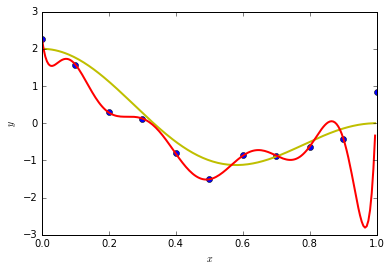

In [4]:
fit_degree=10
poly_basis = True

X, Y = lfd.getData(ifPlotData=False)

# plot the points
plt.plot(X,Y,'o')

x_arange = np.arange(0.0, 1.0, 0.005)

# plot the actual function
y_actual_values = np.cos(math.pi * x_arange) + np.cos(2 * math.pi * x_arange)
line, = plt.plot(x_arange, y_actual_values, lw=2, color="y")

# plot the fit
fit_kwargs = {"color": 'r', "lw": 2}
basis_functions = power_basis(fit_degree) if poly_basis else cosine_basis(fit_degree)
basis_fit_plot(X, Y, basis_functions, x_arange, **fit_kwargs)

# nice setup
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig("../paper/img/2-1_degree{}.pdf".format(fit_degree), format="pdf")
plt.show()

# savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)

In [5]:
X_raw, Y_raw = lfd.getData(ifPlotData=False)

assert len(X_raw) == len(Y_raw)
num_datapoints = len(X_raw)
X = np.array(X_raw).reshape(num_datapoints)
Y = np.array(Y_raw).reshape(num_datapoints)

In [6]:
poly_fit_degree = 1

In [7]:
bgd_weight_vector, bgd_loss = gradient_descent(
        np.zeros(poly_fit_degree + 1),  # initial guess
        lambda w: poly_basis_square_sum_error(w, X, Y),  # obj function
        lambda w: poly_basis_square_sum_error_grad(w, X, Y),
        0.05, # step size
        1e-5, # convergence threshold
        0.05, # gradient approximation parameter (for central diff)
        False, # no convergence by grad norm
        stochastic=False
        )

Past objective function: 0
Past objective function: 6.558191669132731
Past objective function: 6.417979092760937
Past objective function: 6.2918806391136775
Past objective function: 6.176659636406797
Past objective function: 6.071210591596097
Past objective function: 5.9746895894944085
Past objective function: 5.886339349825157
Past objective function: 5.80546807158341
Past objective function: 5.731442639848874
Past objective function: 5.663683544844202
Past objective function: 5.6016603339683675
Past objective function: 5.544887458125716
Past objective function: 5.492920470509673
Past objective function: 5.44535254723986
Past objective function: 5.401811302538107
Past objective function: 5.36195587350404
Past objective function: 5.325474251667777
Past objective function: 5.292080840429712
Past objective function: 5.261514219265792
Past objective function: 5.233535097195336
Past objective function: 5.207924439490146
Past objective function: 5.184481752959784
Past objective function: 5.

In [8]:
def my_plot_basis_fit(weights):
    X, Y = lfd.getData(ifPlotData=False)

    # plot the points
    plt.plot(X,Y,'o')

    x_arange = np.arange(0.0, 1.0, 0.005)

    # plot the actual function
    y_actual_values = np.cos(math.pi * x_arange) + np.cos(2 * math.pi * x_arange)
    line, = plt.plot(x_arange, y_actual_values, lw=2, color="y")

    # plot the fit
    fit_kwargs = {"color": 'r', "lw": 2}
    basis_functions = power_basis(len(weights) - 1)
    
    weights
    
    x_arange_design_matrix = np.array([[f(x) for f in basis_functions] for x in x_arange])
    
    # max likelihood
    max_likelihood_weights = basis_fit(X, Y, basis_functions)
    print("maximum likelihood weights for basis\n{}\n".format(max_likelihood_weights))
    y_ml_fit_values = x_arange_design_matrix.dot(max_likelihood_weights)
    plt.plot(x_arange, y_ml_fit_values, color='r',lw=2)
    
    # gradient descent
    y_gd_fit_values = x_arange_design_matrix.dot(weights)
    plt.plot(x_arange, y_gd_fit_values, color='g',lw=2)

    # nice setup
    plt.xlabel('$x$')
    plt.ylabel('$y$')
#     plt.savefig("../paper/img/2-1_degree{}.pdf".format(fit_degree), format="pdf")
    plt.show()

maximum likelihood weights for basis
[[ 0.90554091]
 [-1.81282727]]



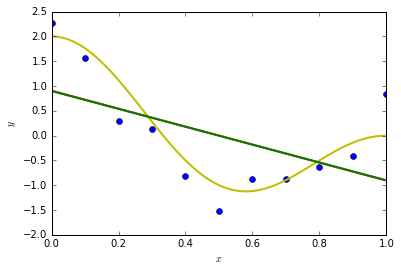

4.931097085637365

In [9]:
my_plot_basis_fit(np.array(bgd_weight_vector))
bgd_loss

In [10]:
sgd_weight_vector, sgd_loss = gradient_descent(
        np.array([0.8, -0.8]),  # initial guess
        lambda w: poly_basis_square_sum_error(w, X, Y),  # obj function
#         lambda w, i: poly_basis_square_sum_error_grad(w, X, Y),
        lambda w, i: poly_basis_square_sum_error_single_elt_grad(w, X, Y, i),
        50, # step size
        0.005, # convergence threshold
        0.05, # gradient approximation parameter (for central diff)
        False, # no convergence by grad norm
        stochastic=True
        )

Past objective function: 0
Past objective function: 7.110390811173981
Past objective function: 7.5663663725579795
Past objective function: 8.44047610844219
Past objective function: 8.869878592292068
Past objective function: 9.78894138260851
Past objective function: 10.145888463393135
Past objective function: 11.057601573848778
Past objective function: 11.32524317951477
Past objective function: 12.203274086376872
Past objective function: 12.37998496635355
Past objective function: 13.21268474425468
Past objective function: 13.304348370787617
Past objective function: 14.08820918615997
Past objective function: 14.103954992881196
Past objective function: 14.839820544607317
Past objective function: 14.789722493048869
Past objective function: 15.48060560214929
Past objective function: 15.374491916631738
Past objective function: 16.024333694031075
Past objective function: 15.871220886216948
Past objective function: 16.484201852737193
Past objective function: 16.29207358633899
Past objective fu

maximum likelihood weights for basis
[[ 0.90554091]
 [-1.81282727]]



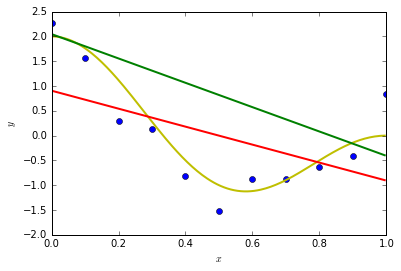

In [11]:
my_plot_basis_fit(np.array(sgd_weight_vector))

In [12]:
print(poly_basis_square_sum_error_grad(np.array([0,0]), X, Y))
print(
    sum([
            poly_basis_square_sum_error_single_elt_grad(np.array([0,0]), X, Y, i)
            for i in range(11)])
    )

[ 0.0096   1.99891]
[ 0.0096   1.99891]


In [13]:
np.zeros(2)

array([ 0.,  0.])